In [1]:
import numpy as np
import sys
import os
import subprocess
import re
import matplotlib.pyplot as plt

In [2]:
# Reading the phonon dispersion data:
def readfile(filename):
    with open(filename, 'r') as file:
        lines = file.readlines()
    return lines

def count_occurrences(filename, target_string):
    count = 0
    line_numbers = []
    with open(filename, 'r') as file:
        for line_number, line in enumerate(file, start=1):
            if target_string in line:
#                 print(line)
                count += 1
                line_numbers.append(line_number)
    return np.array(count), np.array(line_numbers)

## PATH-5: Piecewise path in Brioullioun Zone

[   3 1506 3009 4512 6015 7518] [1503 3006 4509 6012 7515 9018]


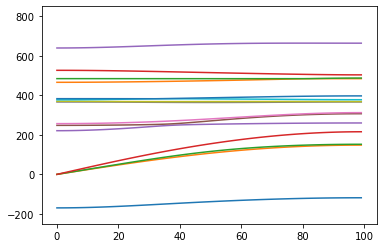

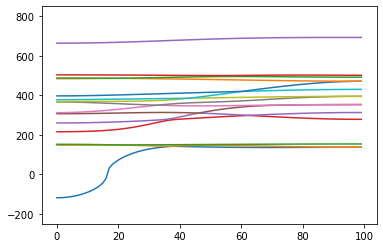

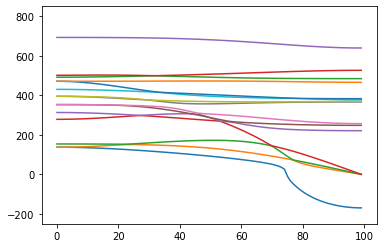

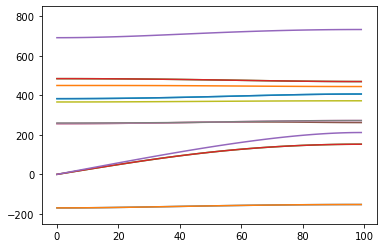

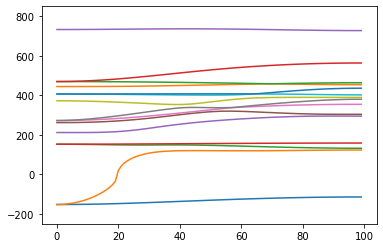

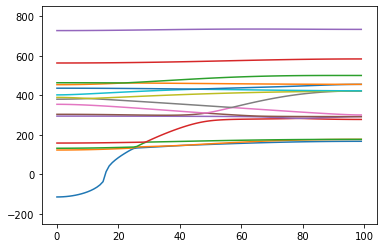

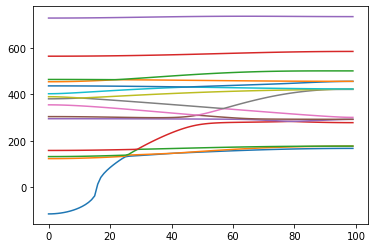

In [3]:
# os.system('ls BaTiO3')
filename = './BaTiO3/Path-5/BaTiO3.disp'
read_file = readfile(filename)

frames, section_num = count_occurrences('./BaTiO3/Path-5/BaTiO3.disp', '#  Section')
section_num = section_num - 1; 

_, final_Kpoint = count_occurrences('./BaTiO3/Path-5/BaTiO3.disp', '#  Final K'); 
final_Kpoint = final_Kpoint-1; 

start_index = final_Kpoint[0:-1] + 1
end_index = section_num[1:]
print(start_index, end_index)
data_spacing = 15

for j in range(len(start_index)):
    disp_data = np.array([list(map(float, lines.strip().split())) for lines in read_file[start_index[j]:end_index[j]]])

    row = (len(disp_data)+1) // data_spacing
    transpose_data = np.zeros((row, (data_spacing)))

    # Extracting the data:
    for i in range(row):
        transpose_data[i:] = disp_data[i*data_spacing:(i+1)*data_spacing].T[1:]

    # Plotting the data:
    for i in range(transpose_data.shape[1]):
        plt.plot(np.arange(transpose_data.shape[0]), transpose_data[:, i])
    plt.ylim(-250, 850)
    plt.show()
    
row = (len(disp_data)+1) // data_spacing
transpose_data = np.zeros((row, (data_spacing)))

# Extracting the data:
for i in range(row):
    transpose_data[i:] = disp_data[i*data_spacing:(i+1)*data_spacing].T[1:]

# Plotting the data:
for i in range(transpose_data.shape[1]):
    plt.plot(np.arange(transpose_data.shape[0]), transpose_data[:, i])
plt.show()

## PATH-3: Gamma-X-M-Gamma-Z-R-A-Z|X-R|M-A

In [4]:
cm_2_THz = 29979245800/1e12
os.system('ls BaTiO3')
filename = './BaTiO3/Path-4/BaTiO3.disp'
read_file = readfile(filename)

BaTiO3.dens
BaTiO3.disp
Path-3
Path-4
Path-5


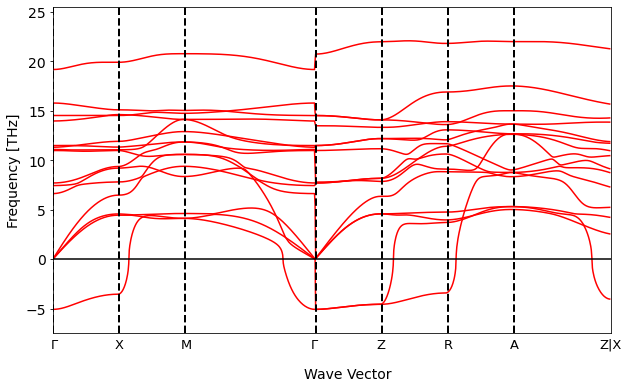

In [5]:
skip_lines = 3    # Skipping the first few lines
data_spacing = 15 # Depends upon number of data in single k-point 

disp_data = np.array([list(map(float, lines.strip().split())) for lines in read_file[skip_lines:]])

row = (len(disp_data)+1) // data_spacing
transpose_data = np.zeros((row, (data_spacing)))

# Extracting the data:
for i in range(row):
    transpose_data[i:] = disp_data[i*data_spacing:(i+1)*data_spacing].T[1:]

# Plotting the data:
fig = plt.figure(figsize=(10,6))
data_len = transpose_data.shape[1]
for i in range(data_len):
#     plt.plot(np.arange(transpose_data.shape[0]), transpose_data[:, i], '-r')
    plt.plot(np.arange(transpose_data.shape[0]), transpose_data[:, i]*cm_2_THz, '-r')

plt.xlim(0, 1000)
# plt.ylim(-250, 850)
plt.ylim(-250*cm_2_THz, 850*cm_2_THz)
plt.axhline(0, color='k')
plt.tick_params(axis='both', which='major')
plt.ylabel('Frequency [cm$^-$$^1$]', fontsize = 14)
plt.ylabel('Frequency [THz]', fontsize = 14)
plt.yticks(fontsize=14)
plt.xticks([])

# Vertical lines:
line = [0, 1, 2, 4, 5, 6, 7, 9]
for x in line:
    plt.axvline(x*118, color='k', linestyle='--', linewidth=2) # Not sure why 118 works here. It was hit and trial

x_loc = [-5, 110, 230, 460, 580, 700, 820, 980]
# y_loc = [-300]*len(x_loc)
y_loc = [-9]*len(x_loc)

path = [r'$\Gamma$', 'X', 'M', r'$\Gamma$', 'Z', 'R', 'A', 'Z|X']

for x in range(len(x_loc)):
    plt.text(x_loc[x], y_loc[x], path[x], fontsize=13)

# plt.text(450, -380, 'Wave Vector', fontsize=14)
plt.text(450, -12, 'Wave Vector', fontsize=14)

# plt.savefig('./BaTiO3/Path-4/Phonon_dispersion_cm.png', dpi= 200, bbox_inches = 'tight', facecolor="w")
# plt.savefig('./BaTiO3/Path-4/Phonon_dispersion_thz.png', dpi= 200, bbox_inches = 'tight', facecolor="w")
plt.show()

In [6]:
#Trying to figureout the region behind value 118 above ?
data_length = np.unique(disp_data[:, 0])
max_val = max(data_length);

# Gamma-X-M-Gamma-Z-R-A-Z|X
K_points = np.array(((0, 0, 0), (0, 0.5, 0), (0.5, 0.5, 0), (0, 0, 0), \
          (0, 0, 0.5), (0, 0.5, 0.5), (0.5, 0.5, 0.5), (0, 0.25, 0.25)))

# Calculate the distance between successive data points
distances = np.linalg.norm(K_points[1:] - K_points[:-1], axis=1)

# print(sum(distances))
# distances

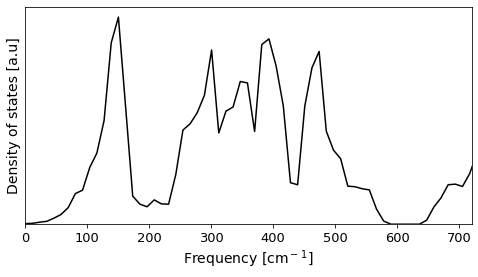

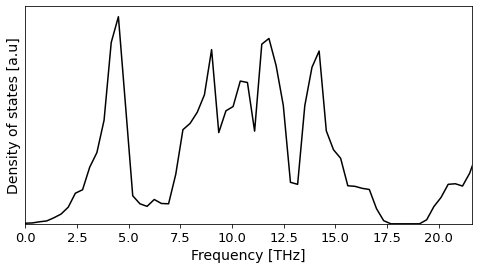

In [7]:
# Phonon density of states:
dos_file = readfile('./BaTiO3/Path-4/BaTiO3.dens')
skip_lines = 2
dos_data = np.array([list(map(float, lines.strip().split())) for lines in dos_file[skip_lines:]])

# DOS cm-1
fig = plt.figure(figsize=(8,4))
plt.plot(dos_data[:, 0], dos_data[:, 1], 'k')
plt.xlim(0, 720)
plt.ylim(0, )
plt.xticks(fontsize = 13)
plt.yticks([])
plt.xlabel('Frequency [cm$^-$$^1$]', fontsize=14)
plt.ylabel('Density of states [a.u]', fontsize=14)
plt.savefig('./BaTiO3/Path-4/Phonon_dos_cm.png', dpi = 200, bbox_inches = 'tight', facecolor="w")
plt.show()

# DOS THz
fig = plt.figure(figsize=(8,4))
plt.plot(dos_data[:, 0]*cm_2_THz, dos_data[:, 1], 'k')
plt.xlim(0, 720*cm_2_THz)
plt.ylim(0, )
plt.xticks(fontsize = 13)
plt.yticks([])
plt.xlabel('Frequency [THz]', fontsize=14)
plt.ylabel('Density of states [a.u]', fontsize=14)
plt.savefig('./BaTiO3/Path-4/Phonon_dos_thz.png', dpi = 200, bbox_inches = 'tight', facecolor="w")
plt.show()